Looking at results from model run trying to imitate a wind event from 15Jan17.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
from matplotlib import animation, rc
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
rc('animation', html='html5')

In [3]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
new_domain = mesh_mask.variables['tmask'][0,:,334:898,114:398]   
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho
def animate_one_density(file1,file2, rho):
    depth = file1.variables['deptht'][:]
    saline1 = file1.variables['vosaline'][:]
    temp1 = file1.variables['votemper'][:]
    saline2 = file1.variables['vosaline'][:]
    temp2 = file1.variables['votemper'][:]
    density1 = calc_rho(saline1, temp1, depth[np.newaxis,:,np.newaxis,np.newaxis])
    index1 = (np.abs(density1 - rho)).argmin(axis=1)
    density2 = calc_rho(saline2, temp2, depth[np.newaxis,:,np.newaxis,np.newaxis])
    index2 = (np.abs(density2 - rho)).argmin(axis=1)
    list_of_depths1 = np.zeros((160,564,284))
    for t in range(160):
        for y in range(564):
            for x in range(284):
                list_of_depths1[t,y,x] = depth[index1[t,y,x]]
    list_of_depths2 = np.zeros((160,564,284))
    for t in range(160):
        for y in range(564):
            for x in range(284):
                list_of_depths2[t,y,x] = depth[index2[t,y,x]]
    mask_land = 1 - new_domain[0,:,:]
    fig,ax = plt.subplots(1,2,figsize=(8,8))
    def animate30(i):
        ax[0].clear()
        masked_depths1 = ma.masked_array(list_of_depths1[i,:,:], mask = mask_land)
        ax[0].contourf(masked_depths1, 
                      levels = np.linspace(0, 30, 8))
        ax[0].set_title('hour = %03d'%(i)) 
        ax[1].clear()
        masked_depths2 = ma.masked_array(list_of_depths2[i,:,:], mask = mask_land)
        ax[1].contourf(masked_depths2, 
                      levels = np.linspace(0, 30, 8))
        ax[1].set_title('hour = %03d'%(i)) 
        return ax

    interval = 0.25#in seconds
    ani40 = animation.FuncAnimation(fig,animate30,frames=160,interval=interval*1e+3, 
                                    repeat=False)
    return ani40

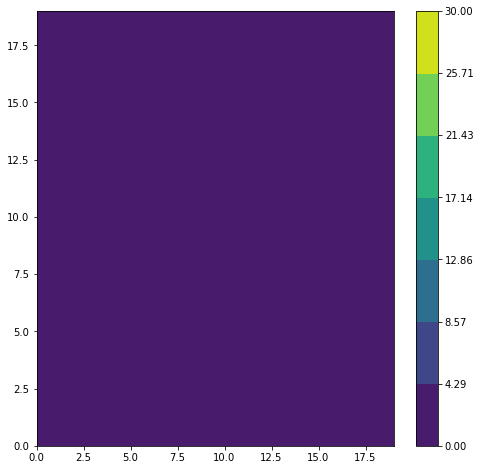

In [18]:
fig, ax = plt.subplots(figsize= (8,8))
den = ax.contourf(np.ones((20,20)), levels = np.linspace(0,30,8))
fig.colorbar(den, ax=ax)

In [4]:
no_utau = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/no_utau/SalishSea_1h_20170101_20170107_grid_T.nc')

In [24]:
with_utau = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/with_utau/SalishSea_1h_20170101_20170107_grid_T.nc')

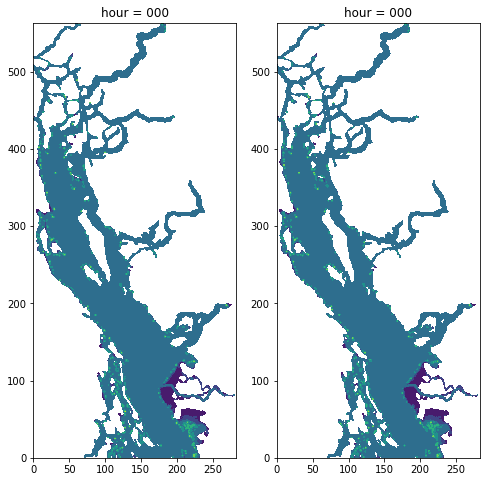

In [23]:
animate_one_density(no_utau, with_utau, 1022.8)

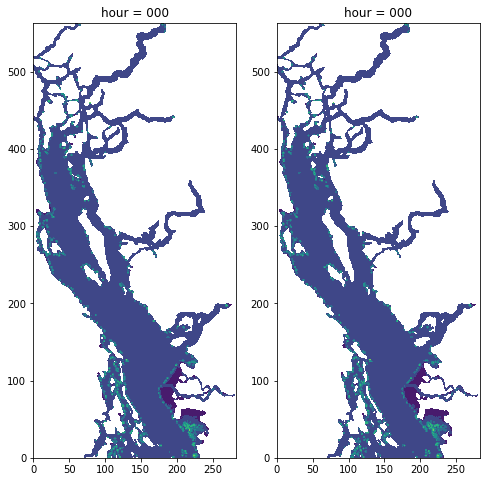

In [24]:
animate_one_density(no_utau, with_utau, 1022.5)

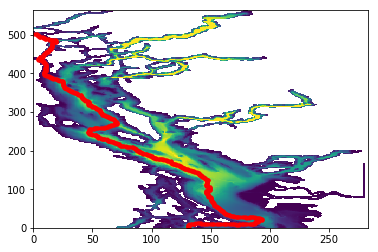

In [101]:
lakebathy = bathy.variables['Bathymetry'][335:, 115:]
plt.pcolormesh(lakebathy)
for point in thalweg_points:
    plt.plot(point[1], point[0], 'r.')

In [4]:
thalweg_points = np.loadtxt('cropped-thalweg.txt')

In [5]:
thalweg_points[0]

array([ 335.,  247.])

In [6]:
f = open(''.txt').readlines()
for x in f:
    print( str (int(x[:3]) - 334), str( int(x[4:7]) - 114))

72 -112
72 -111
72 -110
72 -109
71 -109
71 -108
71 -107
70 -107
69 -107
69 -106
69 -105
69 -104
68 -104
68 -103
67 -103
67 -102
66 -102
66 -101
65 -101
65 -100
64 -100
64 -99
64 -98
63 -98
63 -97
62 -97
62 -96
61 -96
61 -95
60 -95
60 -94
59 -94
59 -93
59 -92
58 -92
58 -91
57 -91
57 -90
56 -90
56 -89
55 -89
55 -88
54 -88
54 -87
53 -87
53 -86
52 -86
52 -85
52 -84
51 -84
51 -83
50 -83
50 -82
49 -82
49 -81
48 -81
48 -80
47 -80
47 -79
46 -79
46 -78
45 -78
45 -77
44 -77
44 -76
44 -75
44 -74
43 -74
42 -74
41 -74
41 -73
40 -73
39 -73
39 -72
38 -72
37 -72
37 -73
36 -73
35 -73
34 -73
34 -72
33 -72
33 -71
32 -71
31 -71
31 -70
30 -70
30 -69
29 -69
29 -68
28 -68
27 -68
27 -67
26 -67
26 -66
26 -65
25 -65
25 -64
24 -64
24 -63
24 -62
23 -62
23 -61
22 -61
22 -60
21 -60
21 -59
21 -58
20 -58
19 -58
19 -57
18 -57
18 -56
17 -56
17 -55
16 -55
15 -55
14 -55
13 -55
12 -55
11 -55
10 -55
9 -55
8 -55
8 -54
7 -54
6 -54
5 -54
4 -54
4 -53
3 -53
3 -52
2 -52
2 -51
1 -51
0 -51
0 -50
-1 -50
-1 -49
-2 -49
-2 -48
-2 -47


In [122]:
sal0 = no_utau.variables['vosaline'][0,:,:,:]
sal0.shape

(40, 564, 284)

In [5]:
from salishsea_tools import visualisations

In [6]:
lakebathy = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/lake_bathy201702.nc')
lake_meshmask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/lake_meshmask201702.nc')

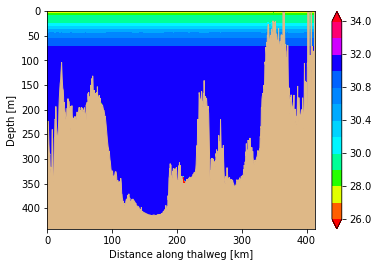

In [137]:
fig,ax = plt.subplots()
visualisations.contour_thalweg(ax, sal0, lakebathy, lake_meshmask, 'salinity', 
                               thalweg_file='salishsealakethalweg.txt')

In [27]:
density = calc_rho(no_utau.variables['vosaline'][:], no_utau.variables['votemper'][:], 
                   no_utau.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])
density2 = calc_rho(with_utau.variables['vosaline'][:], with_utau.variables['votemper'][:], 
                    with_utau.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

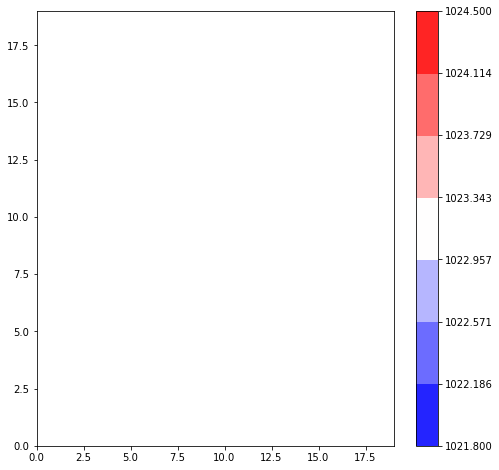

In [32]:
fig, ax = plt.subplots(figsize=(8,8))
den = ax.contourf(np.ones((20,20)), levels = np.linspace(1021.8, 1024.5, 8), cmap = 'bwr')
fig.colorbar(den, ax=ax)

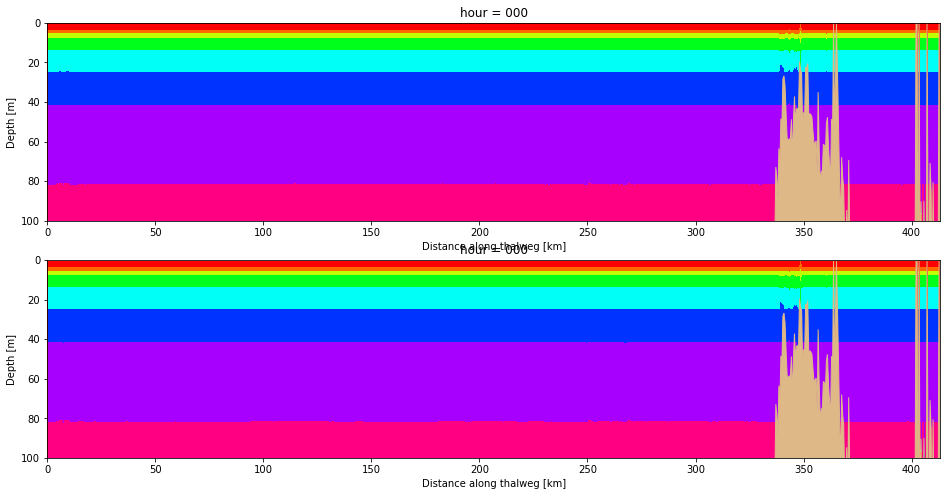

In [29]:
fig,ax = plt.subplots(2,1,figsize=(16,8))
def animate30(i):
    ax[0].clear()
    visualisations.contour_thalweg(ax[0], density[i,...], lakebathy, lake_meshmask, 
                                   np.linspace(1021.8, 1024.5, 8),
                                   thalweg_file='salishsealakethalweg.txt')
    ax[0].set_ylim(100,0)
    ax[0].set_title('hour = %03d'%(i)) 
    ax[1].clear()
    visualisations.contour_thalweg(ax[1], density2[i,...], lakebathy, lake_meshmask, 
                                   np.linspace(1021.8, 1024.5, 8),
                                   thalweg_file='salishsealakethalweg.txt')
    ax[1].set_ylim(100,0)
    ax[1].set_title('hour = %03d'%(i)) 
    return ax

interval = 0.25#in seconds
ani40 = animation.FuncAnimation(fig,animate30,frames=160,interval=interval*1e+3, 
                                    repeat=False)
ani40

Made new thalweg points file, did animation for model run trying to imitate winds from 15Jan17.